# Predicting Price of House using KNearestNeighbour Regressor

### Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Reading data into dataframe

In [4]:
df1 = pd.read_csv('house_rental_data.csv',index_col = 0)
df1.head(3)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000


### Explore Insights on the dataset

In [5]:
df1.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [7]:
df1.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

### Note:
    From the above information we can understand that there are no columns have Null and NA values.
    As well as all columns have numeric data so no need of preprocessing.
    

### Visualizations on Data

<Figure size 1440x1440 with 0 Axes>

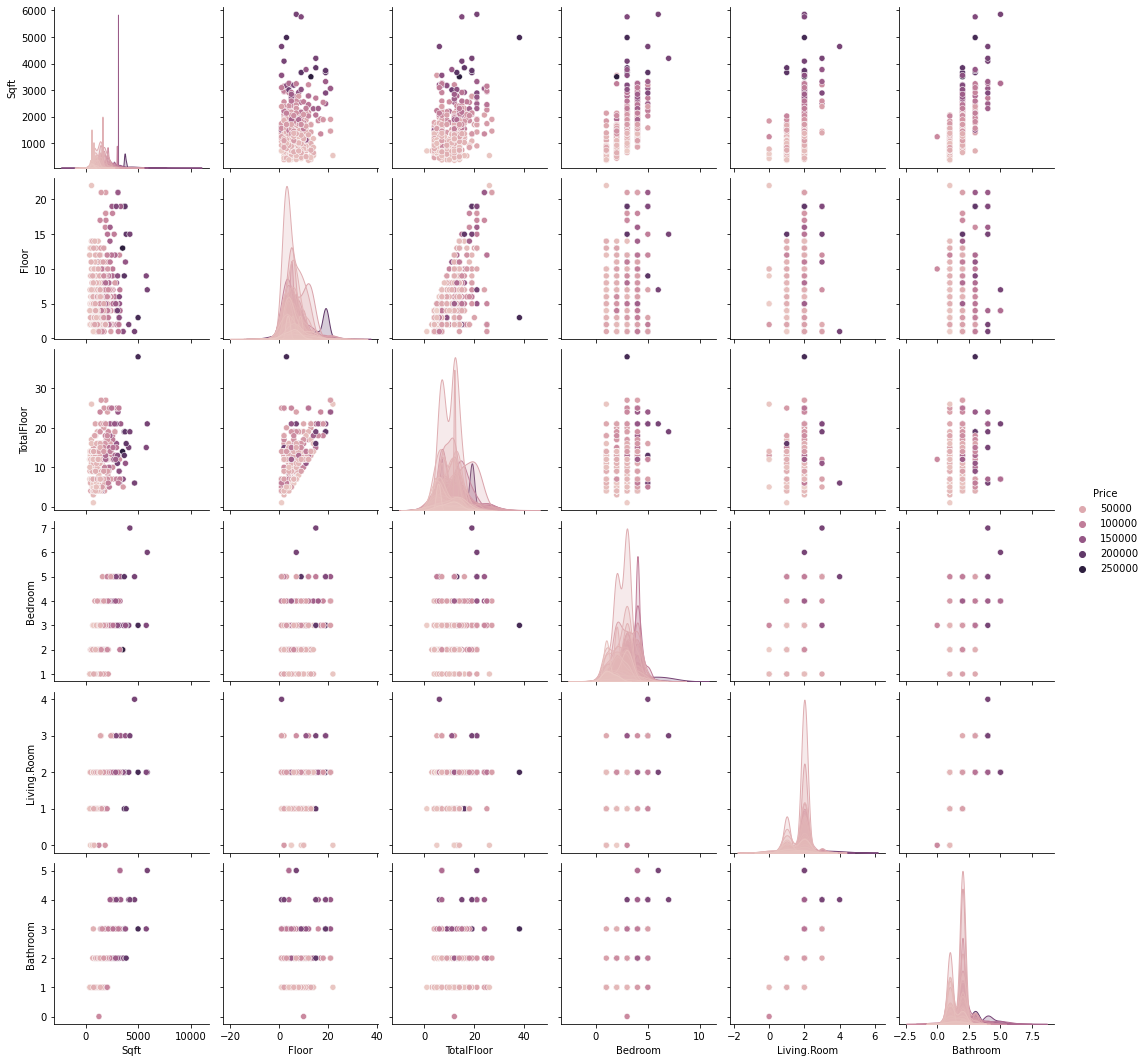

In [18]:
plt.figure(figsize = (20,20))
sns.pairplot(df1, hue = 'Price')

### Note:
    As you can see data points in the scatter plots are clustered and very close to each other.
    Here if we use linear regression, it will definetely perform very bad.
    Therefore for such kind of cases it is better we go for KNN regressor.

In [28]:
df1.corr()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


<AxesSubplot:>

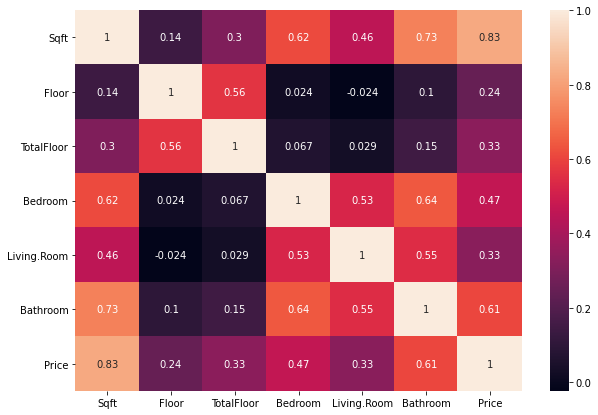

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(),annot = True)

### Note:
    We can conclude that Square feet and Bathroom features are highly correlated with Price.
    Thus these two feature have significant impact on our target variable(output).

### Determining the value of K

In [159]:
x = df1.drop(columns = ['Price'])
y = df1[['Price']]

In [304]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 10)

In [305]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor

In [306]:
rmse = [] #root mean squared error
score = []
for k in range(1,45):
    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,y_predict))
    model_score = knn.score(x_test,y_test)
    score.append(model_score)
    rmse.append(error)

In [307]:
myx = [i for i in range(1,45)]

### Checking the Mean squared error for each K value

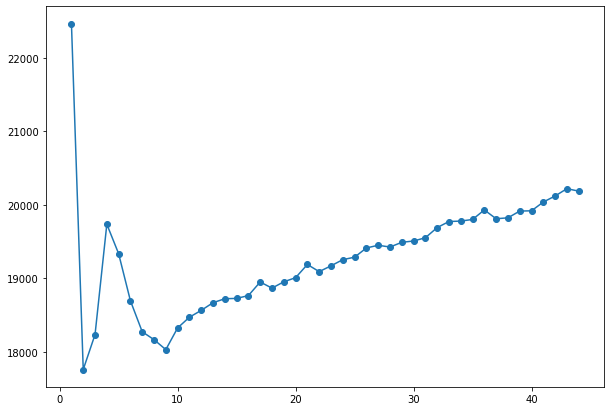

In [308]:
plt.figure(figsize = (10,7))
plt.plot(myx,rmse,marker = "o")

### Checking the Score of model for each K value

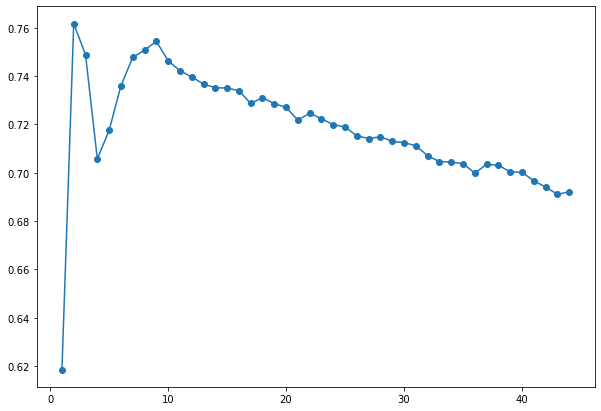

In [309]:
plt.figure(figsize = (10,7))
plt.plot(myx,score,marker = "o")

### Note:
    The best value of K for which Mean squared error value is less and model has high accuracy is 2.

### Model Training and Testing

In [313]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors= 2)
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [314]:
model.score(x_test,y_test)

0.7617079856410639